In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
np.random.seed(100)

In [3]:
df = pd.read_csv('digit_data.csv')

In [4]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([5, 8, 6, ..., 7, 9, 2], dtype=int64)

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    
    W2 = np.random.rand(15, 10) - 0.5
    b2 = np.random.rand(15, 1) - 0.5
    
    W3 = np.random.rand(12,15) - 0.5
    b3 = np.random.rand(12, 1) - 0.5
    
    W4 = np.random.rand(10,12) - 0.5
    b4 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2, W3, b3, W4, b4


In [8]:
def init_params_kaiming():
    def kaiming_initializer(n_in):
        return np.random.normal(0, np.sqrt(2 / n_in))

    W1 = kaiming_initializer(784) * np.random.randn(10, 784)
    b1 = np.zeros((10, 1))
    
    W2 = kaiming_initializer(10) * np.random.randn(15, 10)
    b2 = np.zeros((15, 1))
    
    W3 = kaiming_initializer(15) * np.random.randn(12, 15)
    b3 = np.zeros((12, 1))
    
    W4 = kaiming_initializer(12) * np.random.randn(10, 12)
    b4 = np.zeros((10, 1))
    
    return W1, b1, W2, b2, W3, b3, W4, b4

In [9]:

def init_params_xavier():
    def xavier_initializer(n_in, n_out):
        bound = np.sqrt(6 / (n_in + n_out))
        return np.random.uniform(-bound, bound)

    W1 = xavier_initializer(784, 10) * np.random.rand(10, 784)
    b1 = np.random.rand(10, 1) - 0.5
    
    W2 = xavier_initializer(10, 15) * np.random.rand(15, 10)
    b2 = np.random.rand(15, 1) - 0.5
    
    W3 = xavier_initializer(15, 12) * np.random.rand(12, 15)
    b3 = np.random.rand(12, 1) - 0.5
    
    W4 = xavier_initializer(12, 10) * np.random.rand(10, 12)
    b4 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2, W3, b3, W4, b4


In [10]:
def ReLU(Z):
    return np.maximum(Z, 0)


In [11]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [12]:
def ReLU_deriv(Z):
    return Z > 0


In [13]:
def sigmoid(x):
  
    return 1 / (1 + np.exp(-x))

In [14]:
def tanh(x):
   
    return np.tanh(x)

In [15]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [16]:
def tanh_derivative(x):
    return 1 - tanh(x)**2

In [17]:
def forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    
    Z3 = W3.dot(A2) + b3
    A3 = tanh(Z3)
    
    Z4 = W4.dot(A3) + b4
    A4 = softmax(Z4)
    return Z1, A1, Z2, A2, Z3,A3,Z4,A4

In [18]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [19]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y):
    one_hot_Y = one_hot(Y)
    
    dZ4 = A4 - one_hot_Y
    dW4 = 1 / m * dZ4.dot(A3.T)
    db4 = 1 / m * np.sum(dZ4)
    
    dZ3 = W4.T.dot(dZ4) * tanh_derivative(Z3)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    
    dZ2 = W3.T.dot(dZ3) * sigmoid_derivative(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    
    
    
    return dW1, db1, dW2, db2, dW3, db3, dW4,db4

In [20]:

def update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2 
    
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3    
    
    W4 = W4 - alpha * dW4  
    b4 = b4 - alpha * db4 
    
    return W1, b1, W2, b2, W3, b3, W4, b4

In [21]:
def get_predictions(A2):
    return np.argmax(A2, 0)


In [22]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

**XAVIER INITIALIZATION**

In [23]:

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params_xavier()
    accuracy_scores = []  # To store accuracy scores at different iterations
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
        dW1, db1, dW2, db2, dW3, db3, dW4,db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A4)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))
    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)
    
    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.show()
    
    return W1, b1, W2, b2, W3,b3,W4,b4

Iteration:  0
[7 7 7 ... 7 7 7] [5 8 6 ... 7 9 2]
0.10458536585365853
Iteration:  10
[7 7 7 ... 7 7 7] [5 8 6 ... 7 9 2]
0.10212195121951219
Iteration:  20
[3 7 7 ... 7 7 7] [5 8 6 ... 7 9 2]
0.08204878048780488
Iteration:  30
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.1108780487804878
Iteration:  40
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.11182926829268293
Iteration:  50
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.11182926829268293
Iteration:  60
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.11182926829268293
Iteration:  70
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.11182926829268293
Iteration:  80
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.11182926829268293
Iteration:  90
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.11182926829268293
Iteration:  100
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.11182926829268293
Iteration:  110
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.11182926829268293
Iteration:  120
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.11182926829268293
Iteration:  130
[1 1 1 ... 1 1 1] [5 8 6 ... 7 9 2]
0.11182926829268293
Iter

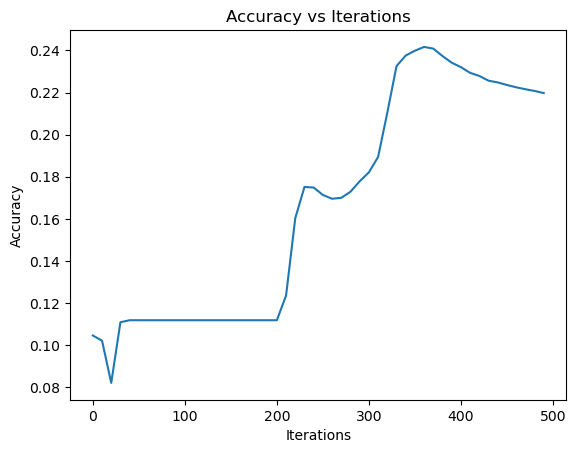

In [24]:
W1, b1, W2, b2, W3,b3,W4,b4 = gradient_descent(X_train, Y_train, 0.10, 500)

In [25]:
def make_predictions(X, W1, b1, W2, b2,W3,b3,W4,b4):
    Z1, A1, Z2, A2, Z3,A3,Z4,A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
    predictions = get_predictions(A4)
    return predictions

def test_prediction(index, W1, b1, W2, b2,W3,b3,W4,b4):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2,W3,b3,W4,b4)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  5


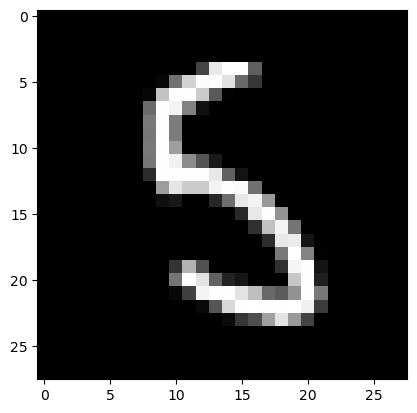

Prediction:  [0]
Label:  8


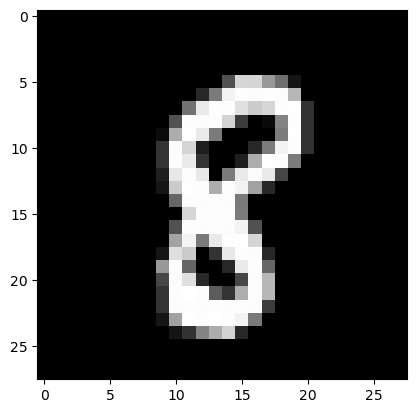

Prediction:  [0]
Label:  6


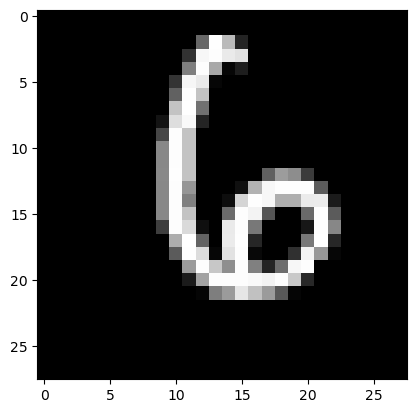

Prediction:  [1]
Label:  1


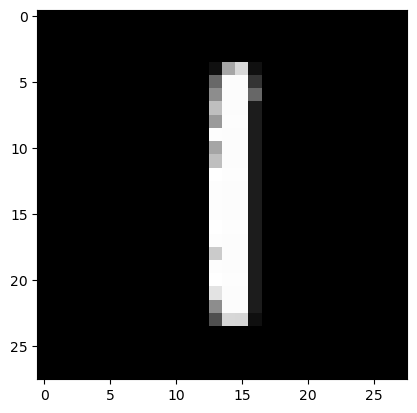

In [26]:
test_prediction(0, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(1, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(2, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(3, W1, b1, W2, b2,W3,b3,W4,b4)

In [27]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3, W4, b4)
get_accuracy(dev_predictions, Y_dev)

[2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 2 0 0 0 1 1 2 0 1 2 0 0 2 1 0 0 0 0 0 2 0 0
 1 0 0 0 2 0 2 0 0 0 0 0 2 0 0 2 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 2 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 2 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 1
 0 0 0 0 1 0 2 0 2 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 2 0 0 1 0
 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 2 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 2 1 1 1 0 1 1 0 1 0 0 0 2 0 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 1 2 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 2 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 2 0 0 0 0 0 1 2 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 2 0 1 0 0 0 2 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0 1 0 0 0 0 2 0 1 0 0 2 1 0 1 0 0 0 0 2
 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0 1 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 

0.22

**KAIMING INITIALIZAION**

In [29]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params_kaiming()
    accuracy_scores = []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
        dW1, db1, dW2, db2, dW3, db3, dW4,db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A4)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))
    
    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)
    
    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.show()
    
    return W1, b1, W2, b2, W3,b3,W4,b4

Iteration:  0
[9 9 9 ... 9 9 9] [5 8 6 ... 7 9 2]
0.10195121951219512
Iteration:  10
[9 9 9 ... 9 9 9] [5 8 6 ... 7 9 2]
0.09948780487804879
Iteration:  20
[6 6 6 ... 6 6 6] [5 8 6 ... 7 9 2]
0.10173170731707316
Iteration:  30
[6 6 6 ... 7 6 6] [5 8 6 ... 7 9 2]
0.18265853658536585
Iteration:  40
[8 8 8 ... 7 8 6] [5 8 6 ... 7 9 2]
0.23446341463414633
Iteration:  50
[8 8 8 ... 7 7 0] [5 8 6 ... 7 9 2]
0.3172926829268293
Iteration:  60
[8 1 8 ... 7 7 0] [5 8 6 ... 7 9 2]
0.29846341463414633
Iteration:  70
[8 8 8 ... 7 7 0] [5 8 6 ... 7 9 2]
0.28485365853658534
Iteration:  80
[3 8 8 ... 7 7 0] [5 8 6 ... 7 9 2]
0.2982439024390244
Iteration:  90
[3 8 8 ... 7 7 0] [5 8 6 ... 7 9 2]
0.3266341463414634
Iteration:  100
[3 8 8 ... 7 7 0] [5 8 6 ... 7 9 2]
0.36009756097560974
Iteration:  110
[3 5 5 ... 7 7 0] [5 8 6 ... 7 9 2]
0.38902439024390245
Iteration:  120
[3 5 5 ... 7 4 0] [5 8 6 ... 7 9 2]
0.4221219512195122
Iteration:  130
[3 5 5 ... 7 4 0] [5 8 6 ... 7 9 2]
0.45607317073170733
Iterati

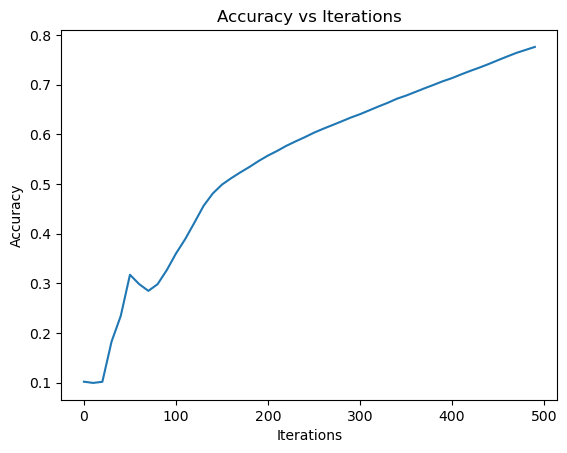

In [30]:
W1, b1, W2, b2, W3,b3,W4,b4 = gradient_descent(X_train, Y_train, 0.10, 500)

Prediction:  [3]
Label:  5


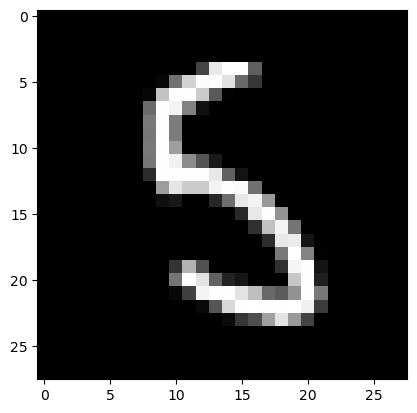

Prediction:  [8]
Label:  8


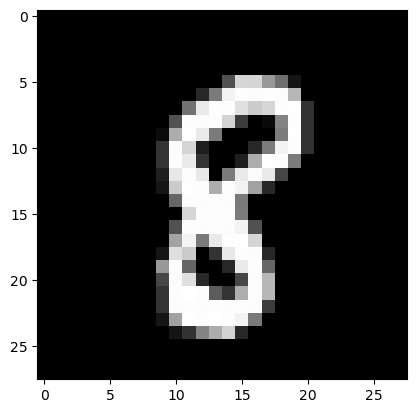

Prediction:  [6]
Label:  6


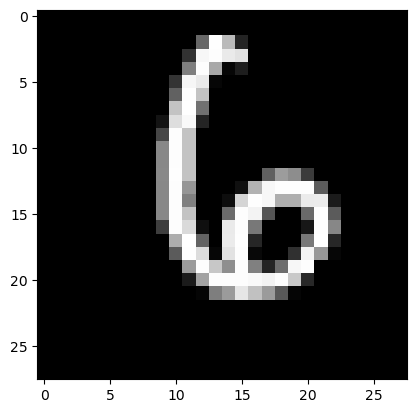

Prediction:  [1]
Label:  1


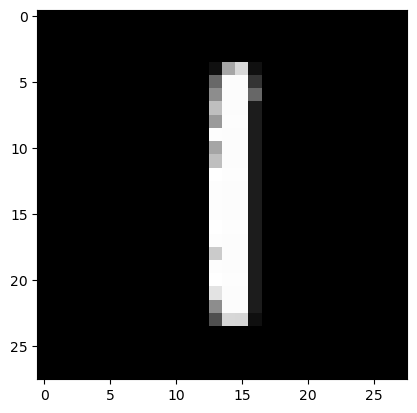

In [31]:
test_prediction(0, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(1, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(2, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(3, W1, b1, W2, b2,W3,b3,W4,b4)

In [32]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3, W4, b4)
get_accuracy(dev_predictions, Y_dev)

[5 0 2 9 7 4 4 5 5 8 3 9 6 7 1 7 9 9 4 8 1 3 9 1 3 9 5 9 3 4 9 0 7 4 5 4 0
 1 5 0 5 5 7 3 4 4 0 4 9 2 6 4 3 9 4 1 3 1 9 7 5 2 1 1 8 7 7 6 0 6 6 0 8 8
 7 5 2 9 9 0 4 4 7 3 8 0 6 6 1 6 0 3 9 7 6 6 0 5 9 1 8 3 3 2 8 9 9 5 6 0 5
 7 8 5 0 3 1 9 2 0 4 5 4 7 1 5 9 2 1 9 7 7 0 3 8 5 4 8 8 3 2 5 5 2 9 0 4 0
 7 7 1 7 9 0 9 1 3 6 7 6 1 7 4 5 1 4 4 6 9 9 9 4 8 5 0 6 5 5 4 9 6 0 4 8 1
 0 9 0 2 8 4 8 3 7 8 0 8 9 4 1 6 4 1 6 6 7 4 6 1 6 7 2 3 0 9 8 4 2 7 7 3 5
 0 1 6 9 2 1 1 1 0 1 7 9 4 6 3 8 3 0 8 2 2 8 8 1 1 3 1 2 0 5 2 2 5 4 6 6 3
 5 8 3 1 3 1 0 1 3 4 1 3 9 0 3 9 0 2 2 3 3 7 2 7 9 8 8 2 7 2 4 1 2 5 0 4 7
 2 1 7 5 4 6 8 6 0 4 6 4 0 6 1 2 2 5 6 4 0 1 6 0 1 3 9 1 4 1 3 4 5 9 9 4 5
 2 7 6 3 0 1 1 2 0 6 7 8 7 1 2 9 8 2 0 1 8 9 9 1 3 0 7 0 4 0 2 8 3 4 5 0 7
 5 3 8 3 0 5 7 2 3 8 6 5 0 3 1 8 7 4 9 5 8 0 5 8 9 7 0 7 9 2 6 6 6 6 7 8 3
 6 8 5 7 9 3 2 0 9 9 4 9 7 1 8 2 6 0 1 0 6 0 0 8 5 1 0 9 2 3 2 2 7 4 6 3 8
 5 7 8 4 5 9 9 4 2 1 0 4 5 9 5 2 0 1 0 3 7 7 4 4 7 6 3 6 2 5 5 0 6 8 7 9 6
 7 5 4 0 4 2 1 4 1 6 0 1 

0.782